# ✏️ Esercizi

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az

In [4]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

## Esercizio 1

Lanciamo 3 monete. Sia $Y$ il numero di volte in cui si ossserva Testa. Si trovi il valore atteso di $Y$, la sua varianza e la sua deviazione standard.

**Soluzione.**

Generiamo lo spazio dei risultati per 3 lanci di moneta. Il valore 0 rappresenta croce e 1 rappresenta testa.

In [2]:
space = np.array([[i, j, k] for i in range(2) for j in range(2) for k in range(2)])
print(space)

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


Calcoliamo Y come la somma dei risultati di ogni combinazione.

In [3]:
Y = space.sum(axis=1)
print(Y)

[0 1 1 2 1 2 2 3]


La lista `Y` contiene dunque i valori della variabile casuale che abbiamo definito, *in corrispondenza di ciascun evento elementare dello spazio campione*.

Calcoliamo il valore atteso di Y: 

$$
\mathbb{E}(Y) = \sum_{y \in Y} y P(Y = y).
$$

In [4]:
p = 1/8  # Ogni risultato ha la stessa probabilità (1/2)^3 = 1/8
mu = (Y * p).sum()
print(mu)

1.5


La varianza si può calcolare in due modi. Usiamo la formula corrispondente alla definizione di varianza di una v.c.:

$$
\mathbb{V}(Y) = \mathbb{E}\big[(y - \mathbb{E}(Y))^2\big]
$$ 

cioè

$$
\mathbb{V}(Y) = \sum_{y \in Y}(y - \mathbb{E}(Y))^2 P(y = Y)
$$

In [5]:
sigma2 = ((Y - mu)**2 * p).sum()
print(sigma2)

0.75


Replichiamo il risultato usando la formula alternativa della varianza:

$$
\mathbb{V}(Y) = \mathbb{E}(Y^2) - \big[\mathbb{E}(Y)\big]^2.
$$

In [8]:
sigma2 = (Y**2 * p).sum() - mu**2
print(sigma2)

0.75


Calcoliamo la deviazione standard di Y:

In [6]:
sigma = np.sqrt(sigma2)
print(sigma)

0.8660254037844386


## Esercizio 2

Supponiamo di sapere che, sulla base dei dati di un campione molto grande, possiamo stabilire che nella popolazione oncologica, i punteggi di un test psicometrico atto a misurare l'astenia (ovvero, la riduzione di energia dell’individuo) seguono la distribuzione di massa di probabilità indicata qui sotto: 

| Valore | Probabilità |
|--------|------------|
| 1      | 0.1        |
| 2      | 0.5        |
| 3      | 0.3        |
| 4      | 0.1        |

laddove la probabilità indica la frequenza con la quale ogni sintomo si manifesta. Per esempio, potremmo avere che 4 corrisponde a “molto spesso”, 3 corrisponde a “spesso”, 2 corrisponde a “alle volte” e 1 corrisponde a “raramente o mai”.

Iniziamo con la rappresentazione grafica della distribuzione di massa di probabilità.


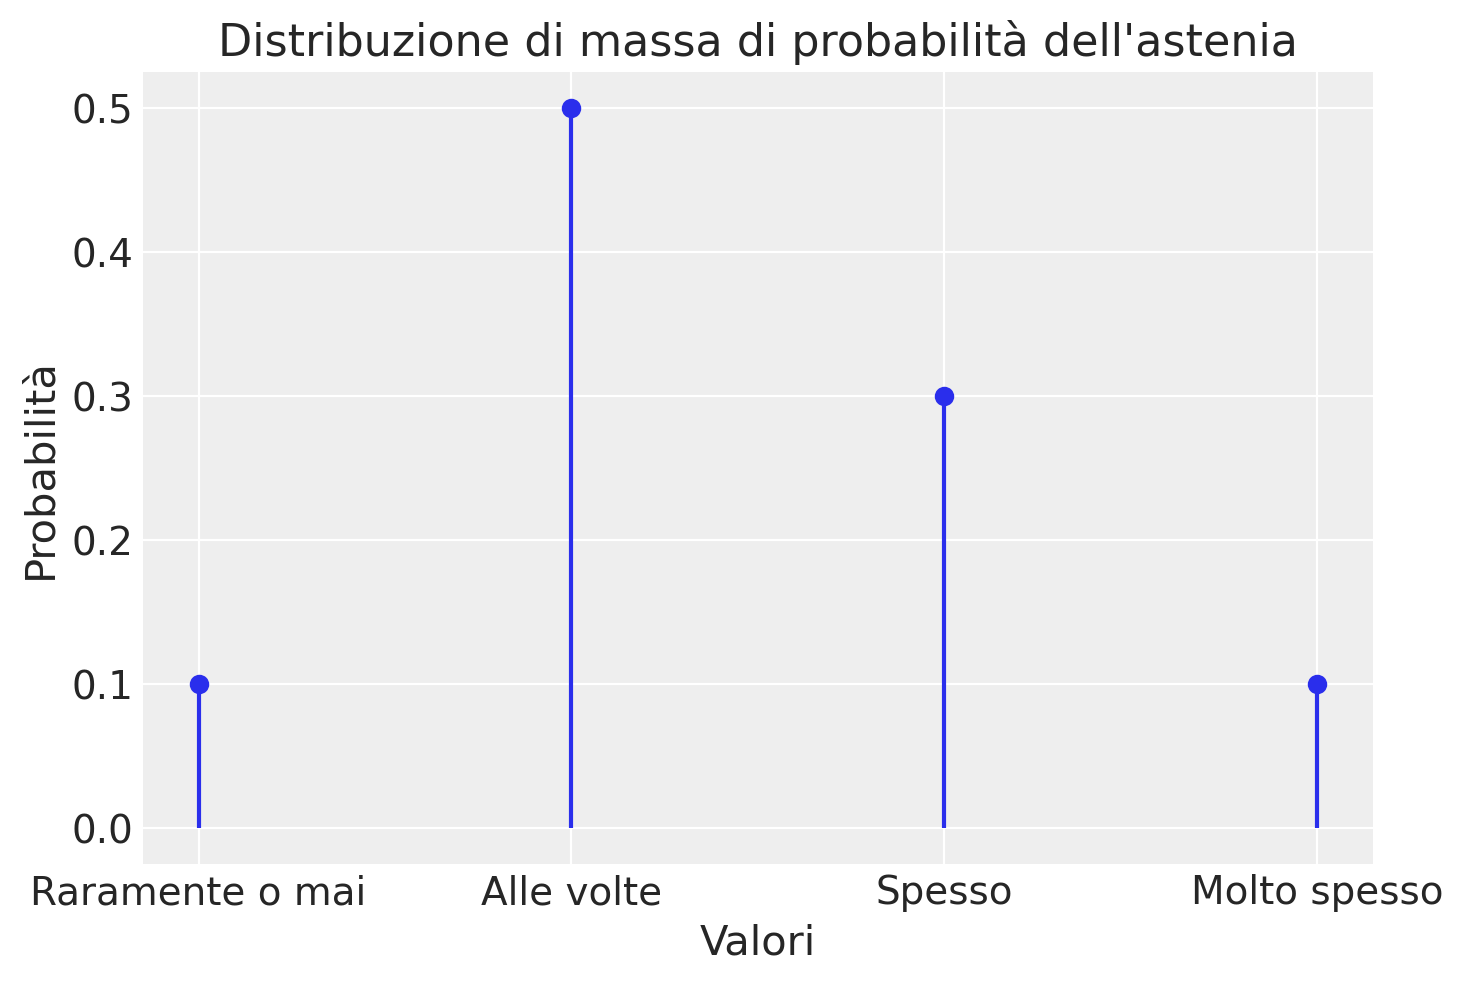

In [11]:
# Definiamo i valori della distribuzione di massa di probabilità
valori = np.array([1, 2, 3, 4])
probabilita = np.array([0.1, 0.5, 0.3, 0.1])

# Creiamo lo stem plot per rappresentare la distribuzione di massa di probabilità
plt.stem(valori, probabilita, linefmt="-", markerfmt="o", basefmt=" ")

# Aggiungiamo etichette e titoli al grafico
plt.xlabel("Valori")
plt.ylabel("Probabilità")
plt.title("Distribuzione di massa di probabilità dell'astenia")
plt.xticks(valori, ["Raramente o mai", "Alle volte", "Spesso", "Molto spesso"])

# Mostrare il grafico
plt.show()

Per i punteggi di astenia di questo ipotetico test, poniamoci ora il problema di trovare il valore atteso e la varianza. In seguito, ci porreo il problema di assegnare un’interpretazione inuitiva a questi concetti.

Il valore atteso (o media) è dato da:

$$
E[X] = \sum_{i} x_i \cdot p_i.
$$

La varianza è data da:

$$
Var[X] = \sum_{i} (x_i - E[X])^2 \cdot p_i. 
$$

Le tre istruzioni seguenti producono tutte lo stesso risultato. Le prime due usano le funzionalità di base di Python; la terza usa NumPy.

In [12]:
valore_atteso = sum(
    valore * probabilita for valore, probabilita in zip(valori, probabilita)
)
print(valore_atteso)

2.4


In [13]:
valore_atteso = sum(valori[i] * probabilita[i] for i in range(len(valori)))
print(valore_atteso)

2.4


In [15]:
valore_atteso = (valori * probabilita).sum()
print(valore_atteso)

2.4


Calcoliamo ora la varianza.

In [17]:
varianza = ((valori - valore_atteso) ** 2 * probabilita).sum()
print(varianza)

0.64


Per interare il risultato, svolgiamo una simulazione. Simuliamo la generazione di 100000 valori casuali per la variabile casuale che è stata definita.

In [22]:
valori_generati = np.random.choice(valori, size=100000, p=probabilita)
valori_generati.shape

(10000,)

Calcoliamo la media dei valori generati

In [25]:
media = np.mean(valori_generati)
print("Media dei valori generati:", media)

Media dei valori generati: 2.398


Calcoliamo la varianza dei valori generati:

In [24]:
varianza = np.var(valori_generati)
print("Varianza dei valori generati:", varianza)

Varianza dei valori generati: 0.6339959999999999


Quindi l'interpretazione di valore atteso e di varianza di una v.c. è semplice: il valore atteso e la varianza di una variabile causale non sono altro che media e la varianza di un numero molto grande di realizzazioni della variabile casuale.

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w -m